## 1. Parameters

In [2]:
import pandas as pd
import numpy as np
import math

#### 1.1 CdS (1)

In [30]:
d1 = 500 * 10**(-6)
n1 = 2.53
R1 = (1-n1)**2 / (1+n1)**2

CdS = pd.read_csv("CdS_1110.csv")
CdS.columns = ['Lambda', 'CdS_I']
R1

0.18785962490670816

#### 1.2 GaP (2)

In [31]:
d2 = 400 * 10**(-6)
n2 = 3.38
R2 = (1-n2)**2 / (1+n2)**2

GaP = pd.read_csv("GaP_1110.csv")
GaP.columns = ['Lambda', 'GaP_I']
R2

0.29526073267863473

#### 1.3 No Material(30)

In [5]:
I0 = pd.read_csv("Puste_1110.csv")
I0.columns = ['Lambda', 'I0']

#### 1.4 Creating Dataframe

In [6]:
Data = I0.join(CdS['CdS_I'])
Data = Data.join(GaP['GaP_I'])
#Data['Lambda'] = Data['Lambda'] * 10**(-9)

In [7]:
Data['CdS_T'] = Data['CdS_I'] / Data['I0'] 
Data['GaP_T'] = Data['GaP_I'] / Data['I0']

In [8]:
#### 1.5 Adding Energy

In [9]:
import scipy.constants as spy
Planck = spy.Planck
c = spy.c
j_to_eV = spy.physical_constants['joule-electron volt relationship'][0]

Data['Photon_Energy'] =(Planck * c) / Data['Lambda'] * j_to_eV
Data.head()

,Lambda,I0,CdS_I,GaP_I,CdS_T,GaP_T,Photon_Energy
0,480,6407040,928,98,0.000145,0.000015,2.583004e-09
1,483,7041070,992,106,0.000141,0.000015,2.566961e-09
2,485,7675100,1152,111,0.000150,0.000014,2.556375e-09
3,487,8342500,1312,117,0.000157,0.000014,2.545877e-09
4,489,9009900,1520,124,0.000169,0.000014,2.535464e-09


## Case 1: Simple

In [10]:
def simple_alpha(T, d):
    alpha = 1/d *  math.log(1/T)
    return alpha

Data['CdS_alpha_simple'] = Data['CdS_T'].apply( lambda x: simple_alpha(x, d1))
Data['GaP_alpha_simple'] = Data['GaP_T'].apply( lambda x: simple_alpha(x, d2))
Data.head()

,Lambda,I0,CdS_I,GaP_I,CdS_T,GaP_T,Photon_Energy,CdS_alpha_simple,GaP_alpha_simple
0,480,6407040,928,98,0.000145,0.000015,2.583004e-09,17679.752422,27719.851163
1,483,7041070,992,106,0.000141,0.000015,2.566961e-09,17735.095196,27759.579028
2,485,7675100,1152,111,0.000150,0.000014,2.556375e-09,17608.474079,27859.904198
3,487,8342500,1312,117,0.000157,0.000014,2.545877e-09,17515.131040,27936.748887
4,489,9009900,1520,124,0.000169,0.000014,2.535464e-09,17374.737834,27983.882413


## Case 2: Harder

In [11]:
def extended_alpha(T, d, R):
    alpha = 1/d *  math.log( (1-R)**2 /T)
    return alpha

Data['CdS_alpha_extended'] = Data['CdS_T'].apply( lambda x: extended_alpha(x, d1, R1))
Data['GaP_alpha_extended'] = Data['GaP_T'].apply( lambda x: extended_alpha(x, d2, R2))
Data.head()

,Lambda,I0,CdS_I,GaP_I,CdS_T,GaP_T,Photon_Energy,CdS_alpha_simple,GaP_alpha_simple,CdS_alpha_extended,GaP_alpha_extended
0,480,6407040,928,98,0.000145,0.000015,2.583004e-09,17679.752422,27719.851163,16847.424110,25970.214272
1,483,7041070,992,106,0.000141,0.000015,2.566961e-09,17735.095196,27759.579028,16902.766884,26009.942137
2,485,7675100,1152,111,0.000150,0.000014,2.556375e-09,17608.474079,27859.904198,16776.145767,26110.267308
3,487,8342500,1312,117,0.000157,0.000014,2.545877e-09,17515.131040,27936.748887,16682.802728,26187.111996
4,489,9009900,1520,124,0.000169,0.000014,2.535464e-09,17374.737834,27983.882413,16542.409522,26234.245522


## Zaleznosc wspolczynnika absorbcji od dlugosci Fali (4.)

In [12]:
import matplotlib.pyplot as plt

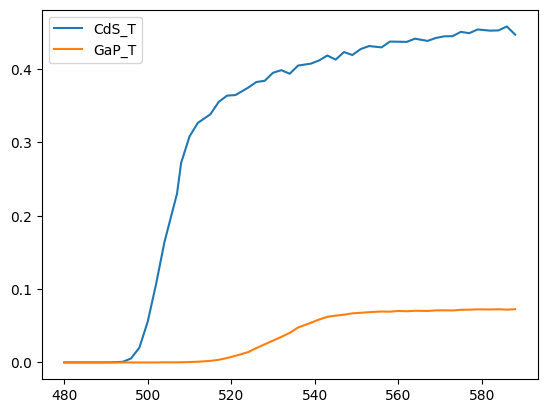

In [13]:
fig, ax = plt.subplots()
ax.plot(Data['Lambda'], Data['CdS_T'], label='CdS_T')
ax.plot(Data['Lambda'], Data['GaP_T'], label='GaP_T')

plt.legend()
plt.show()

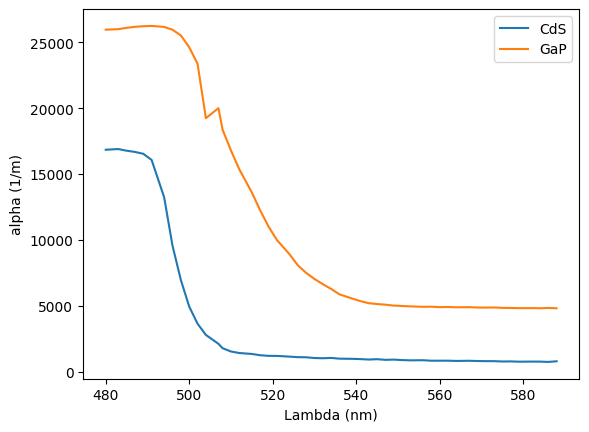

In [29]:
fig, ax = plt.subplots()
ax.plot(Data['Lambda'], Data['CdS_alpha_extended'], label='CdS')
ax.plot(Data['Lambda'], Data['GaP_alpha_extended'], label='GaP')

ax.set(xlabel='Lambda (nm)', ylabel='alpha (1/m)')

plt.legend()
plt.show()

## Wykresy ^2 sqrt i ln (5)

#### 1. ^2

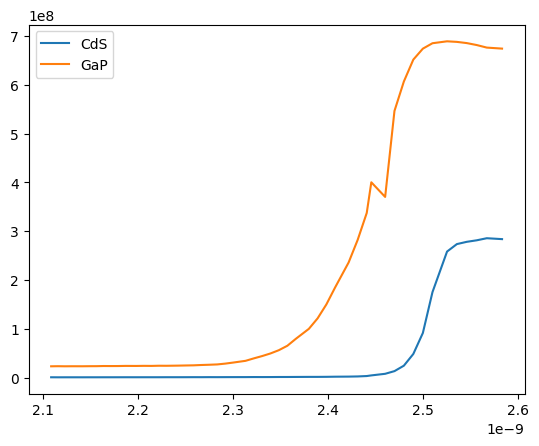

In [32]:
alpha_square_CdS = Data['CdS_alpha_extended']**2
alpha_square_GaP = Data['GaP_alpha_extended']**2

fig, ax = plt.subplots()
ax.plot(Data['Photon_Energy'], alpha_square_CdS, label='CdS')
ax.plot(Data['Photon_Energy'], alpha_square_GaP, label='GaP')

plt.legend()
plt.show()

#### 2. sqrt

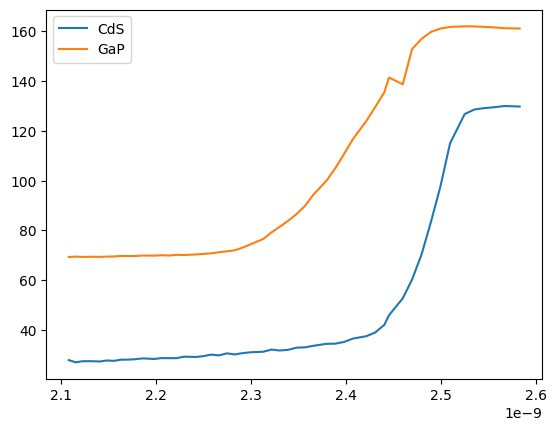

In [33]:
alpha_square_CdS = np.sqrt(Data['CdS_alpha_extended'])
alpha_square_GaP = np.sqrt(Data['GaP_alpha_extended'])

fig, ax = plt.subplots()
ax.plot(Data['Photon_Energy'], alpha_square_CdS, label='CdS')
ax.plot(Data['Photon_Energy'], alpha_square_GaP, label='GaP')

plt.legend()
plt.show()

#### 3. ln

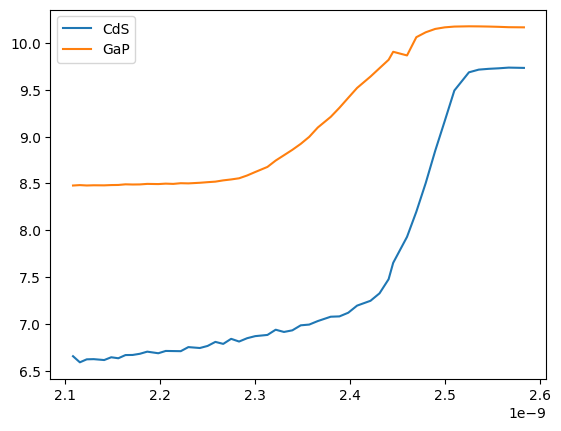

In [34]:
alpha_square_CdS = np.log(Data['CdS_alpha_extended'])
alpha_square_GaP = np.log(Data['GaP_alpha_extended'])

fig, ax = plt.subplots()
ax.plot(Data['Photon_Energy'], alpha_square_CdS, label='CdS')
ax.plot(Data['Photon_Energy'], alpha_square_GaP, label='GaP')

plt.legend()
plt.show()

In [20]:
Data.to_csv('Absorbcja_w_polprzewodnikach.csv')

PermissionError: [Errno 13] Permission denied: 'Absorbcja_w_polprzewodnikach.csv'